Task 1: Understand the Dataset

In [1]:
import pandas as pd

df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

print("Dataset loaded successfully!")
print("-" * 50)

print("First 10 rows of the dataset:")
print(df.head(10))
print("-" * 50)

print("Dataset Shape (Rows, Columns):")
print(df.shape)
print("-" * 50)

print("Column Names:")
print(df.columns.tolist())
print("-" * 50)

print("Data Types:")
print(df.dtypes)
print("-" * 50)

print("Summary Statistics:")
print(df.describe())
print("-" * 50)

print("Missing Values in Each Column:")
print(df.isnull().sum())
print("-" * 50)

print("Number of Duplicate Rows:")
print(df.duplicated().sum())
print("-" * 50)

print("Columns with Object Data Type:")
print(df.select_dtypes(include='object').columns.tolist())
print("-" * 50)

Dataset loaded successfully!
--------------------------------------------------
First 10 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      Mul

Tasks 2: Data Cleaning

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

print("Initial Dataset Shape:", df.shape)
print("-" * 50)

df.columns = df.columns.str.lower().str.replace(" ", "_")

print("Standardized Column Names:")
print(df.columns.tolist())
print("-" * 50)

df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'] = df['totalcharges'].fillna(df['totalcharges'].median())

print("Missing Values After Cleaning:")
print(df.isnull().sum())
print("-" * 50)

print("Duplicate Rows Found:", df.duplicated().sum())
df = df.drop_duplicates()

print("Final Dataset Shape:", df.shape)
print("-" * 50)

df.info()

Initial Dataset Shape: (7043, 21)
--------------------------------------------------
Standardized Column Names:
['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']
--------------------------------------------------
Missing Values After Cleaning:
customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64
-------

Tasks 3: Exploratory Data Analysis (EDA)

Summary Statistics (Mean):
       seniorcitizen       tenure  monthlycharges  totalcharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000
--------------------------------------------------
Median Values:
seniorcitizen        0.000
tenure              29.000
monthlycharges      70.350
totalcharges      1397.475
dtype: float64
--------------------------------------------------
Mode Values:
customerid                0002-ORFBO
gender                          Male
seniorcitizen                    0.0
partner                          

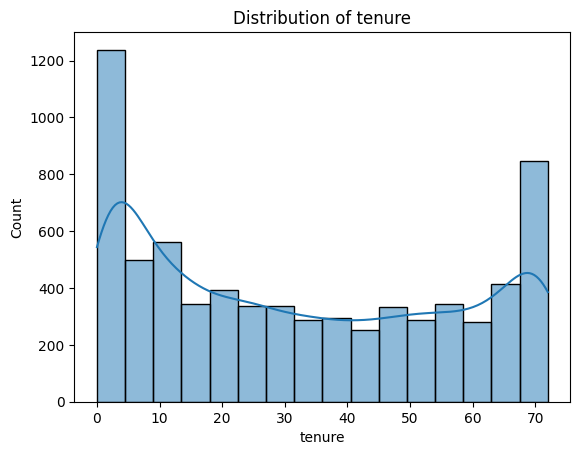

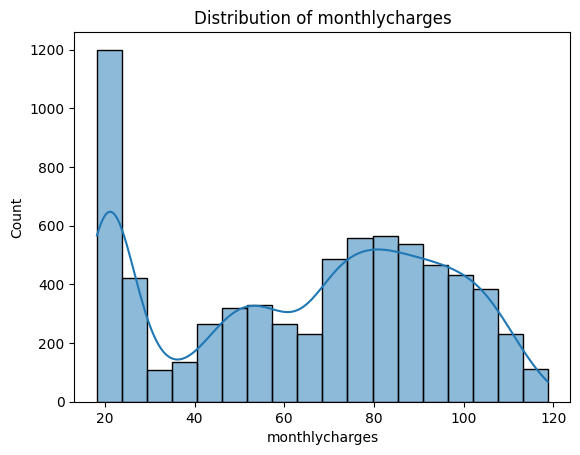

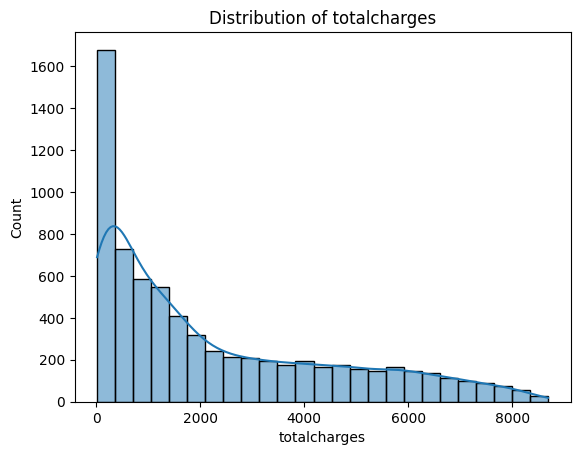

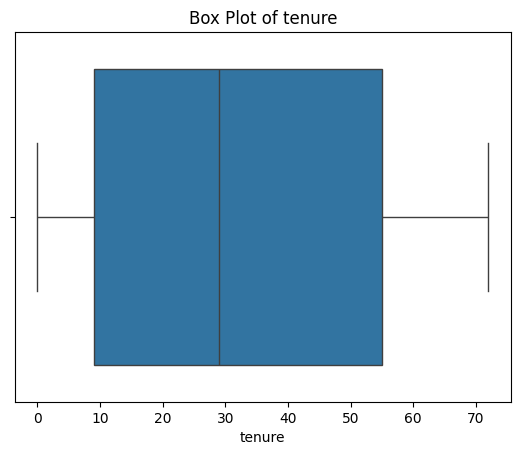

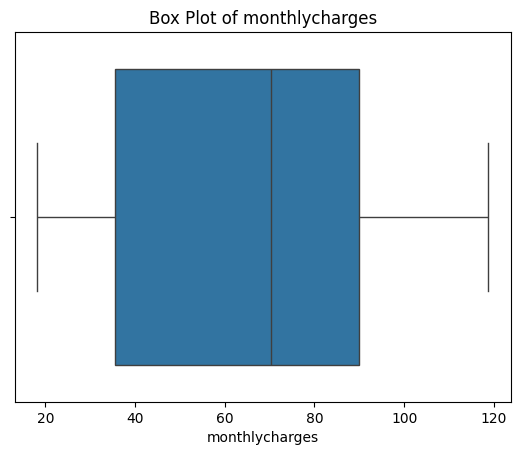

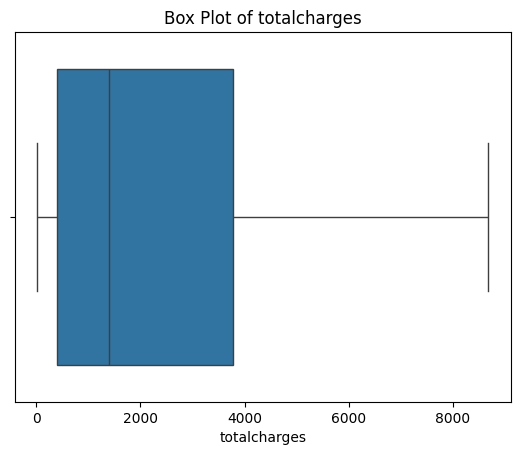

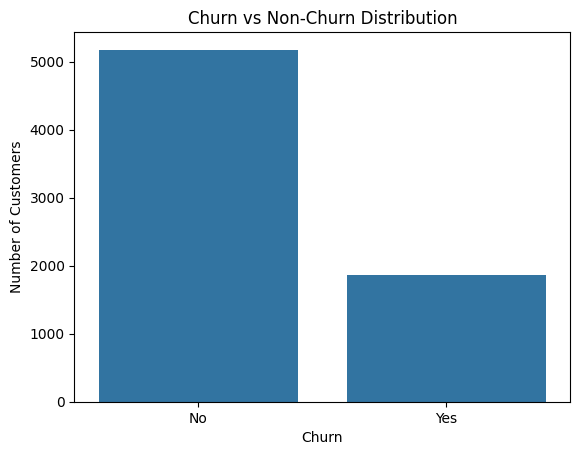

Churn Rate (%):
churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

df.columns = df.columns.str.lower().str.replace(" ", "_")
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'] = df['totalcharges'].fillna(df['totalcharges'].median())

summary_stats = df.describe()
median_values = df.median(numeric_only=True)
mode_values = df.mode().iloc[0]

print("Summary Statistics (Mean):")
print(summary_stats)
print("-" * 50)

print("Median Values:")
print(median_values)
print("-" * 50)

print("Mode Values:")
print(mode_values)
print("-" * 50)

numerical_cols = ['tenure', 'monthlycharges', 'totalcharges']

for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

churn_counts = df['churn'].value_counts()

plt.figure()
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title("Churn vs Non-Churn Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Churn")
plt.show()

churn_rate = df['churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):")
print(churn_rate)

Tasks 4: Customer Segmentation Visualization

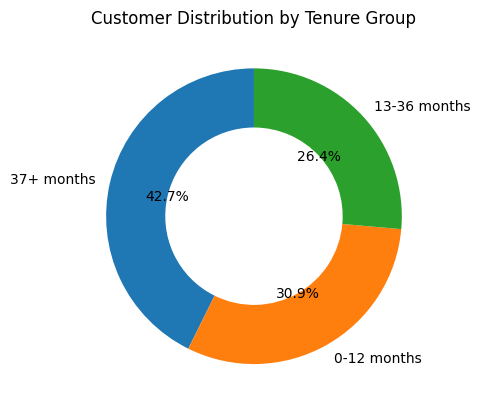

C:\Users\gaura\AppData\Local\Temp\ipykernel_2496\1618609864.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_group')['monthlycharges']


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

df.columns = df.columns.str.lower().str.replace(" ", "_")
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'] = df['totalcharges'].fillna(df['totalcharges'].median())

df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 36, df['tenure'].max()],
    labels=['0-12 months', '13-36 months', '37+ months']
)

tenure_counts = df['tenure_group'].value_counts()

plt.figure()
plt.pie(
    tenure_counts,
    labels=tenure_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.title("Customer Distribution by Tenure Group")
plt.show()

avg_monthly_charges = (
    df.groupby('tenure_group')['monthlycharges']
    .mean()
    .reset_index()
)

fig = px.bar(
    avg_monthly_charges,
    x='tenure_group',
    y='monthlycharges',
    text='monthlycharges',
    title='Average Monthly Charges by Tenure Group'
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis_title='Average Monthly Charges', xaxis_title='Tenure Group')

fig.show()